In [ ]:
import os
os.chdir("/home/haok/MoE-Research")

import pickle
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


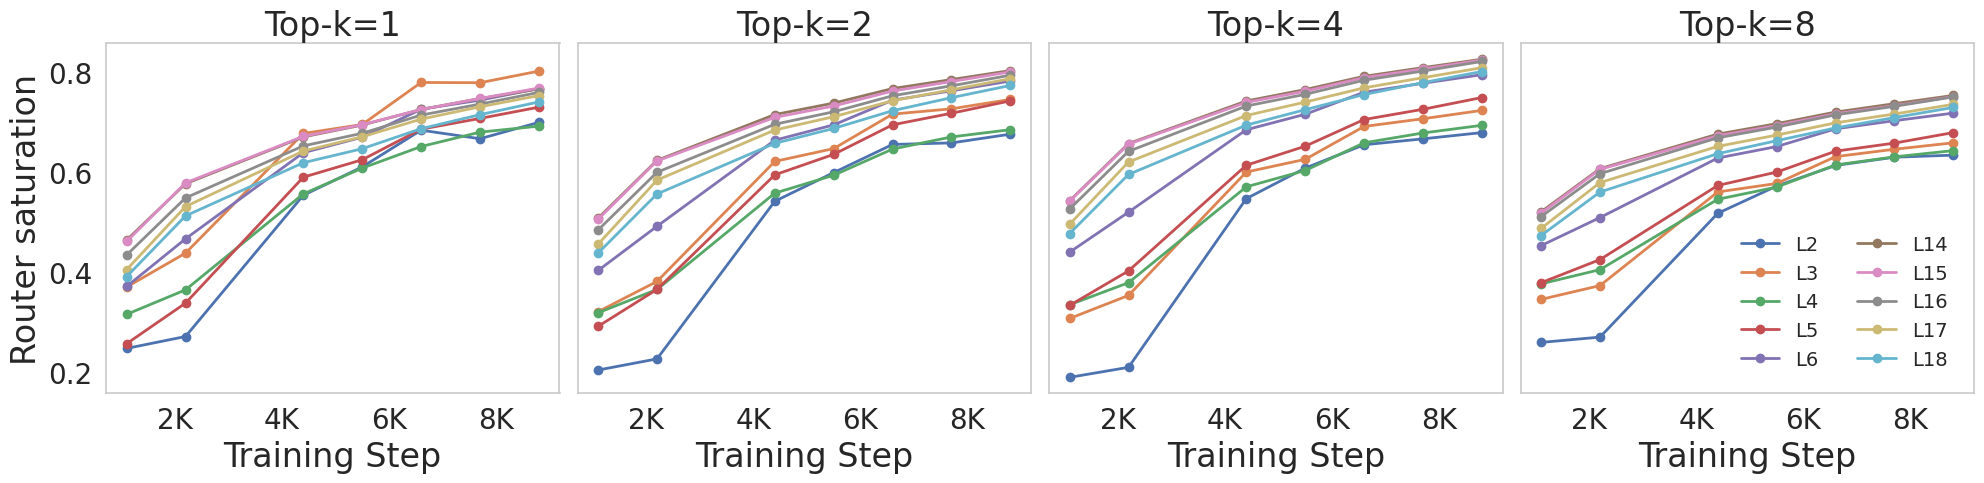

In [32]:
def human_format(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.0f}B'
    elif x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x}'

ks = [1, 2, 4, 8]
layers = ['2', '3', '4', '5', '6', '14', '15', '16', '17', '18']
checkpoints = ['1100', '2200', '4400', '5500', '6600', '7700', '8800']
steps = [int(c) for c in checkpoints]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, k in enumerate(ks):
    with open(f"results/router-saturation/flame-moe-1.7b/{k}.pkl", "rb") as f:
        record = pickle.load(f)

    ax = axes[i]
    for layer in layers:
        values = [record[step][layer] for step in checkpoints]
        ax.plot(steps, values, marker='o', label=f'L{layer}', linewidth=2)

    ax.set_xlabel("Training Step", fontsize=24)
    if i == 0: ax.set_ylabel("Router saturation", fontsize=24)
    ax.set_title(f"Top-k={k}", fontsize=24)

    ax.tick_params(axis='both', labelsize=20)
    ax.xaxis.set_major_formatter(FuncFormatter(human_format))
    ax.grid(False)

    if i == len(ks) - 1:
        ax.legend(
            loc='lower right',
            bbox_to_anchor=(0.98, 0.02),
            fontsize=14,
            frameon=False,
            ncol=2
        )

file = Path(f"figures/router-saturation/flame-moe-1.7b.pdf")
file.parent.mkdir(parents=True, exist_ok=True)
plt.tight_layout()
plt.savefig(file, bbox_inches='tight', pad_inches=0)
plt.show()
